In [1]:
%pylab inline
import sys
sys.dont_write_bytecode = True

Populating the interactive namespace from numpy and matplotlib


## 数据提取读取效果

In [2]:
from data import train_Sequence, valid_Sequence

Using TensorFlow backend.


In [30]:
images, labels = train_Sequence[11]
images = (images + 1) / 2

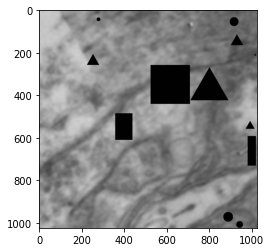

In [32]:
imshow(images[3])

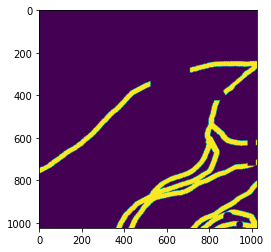

In [33]:
imshow(labels[3, ..., 0])

## 模型设计与训练

In [39]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import keras as kr
from seg_models import Linknet
from seg_models.losses import binary_focal_dice_loss
from modules.metrics import dice_coef, dilation_dice_coef

IMAGE_SIZE = (None, None)
model = Linknet("resnet34", input_shape=IMAGE_SIZE+(3,))

In [40]:
optimizer = kr.optimizers.Adam()
loss = binary_focal_dice_loss
metrics_lst = [dice_coef]

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics_lst)
model.fit_generator(train_Sequence, validation_data=valid_Sequence)

## 模型预测

In [44]:
model.load_weights("model-stage1.h5")

In [45]:
images, labels  = valid_Sequence[5]
images = (images + 1) / 2

In [46]:
res = model.predict(images)

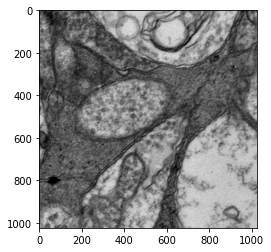

In [47]:
idx = 1
imshow(images[idx])

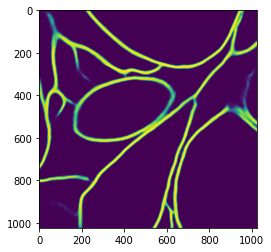

In [48]:
imshow(res[idx, ..., 0])

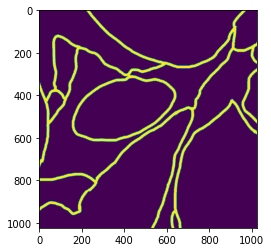

In [49]:
imshow(labels[idx, ..., 0])